In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import PandasTools

+ Sanitization of SMILES.
+ Calculation of physicochemical descriptors 
+ Chemical Space analysis
+ Ro5 analysis

In [2]:
df = pd.read_csv("dataset.csv",sep="\t")

In [3]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,label,pIC50
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721


In [4]:
df.shape

(1559, 5)

+ We need to standardize (clean up) the structures. Previously we used molvs, now we use rdMolStandardize implemented in rdkit. 

+ More information about this tool can be found here "https://github.com/rdkit/rdkit/blob/master/Docs/Notebooks/MolStandardize.ipynb"

In [5]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="Smiles")

,Molecule ChEMBL ID,Smiles,#RO5 Violations,label,pIC50,ROMol
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019,
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819,
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729,
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819,
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721,

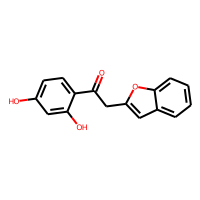
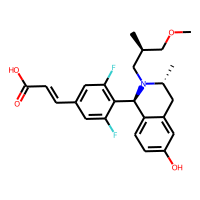
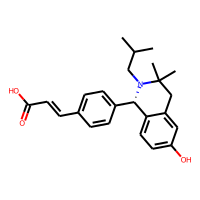
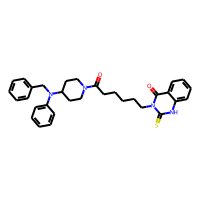
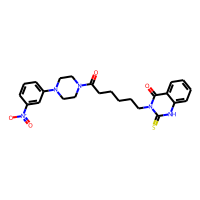

In [6]:
df.head()

In [7]:
from molvs import Standardizer

In [8]:
s = Standardizer()

In [9]:
df["mol"] = [s.standardize(m) for m in df["ROMol"]] 

RDKit ERROR: [20:52:37] Can't kekulize mol.  Unkekulized atoms: 3 10
[20:52:37] Can't kekulize mol.  Unkekulized atoms: 3 10

RDKit ERROR: 


In [10]:
df["smiles"] = [Chem.MolToSmiles(m) for m in df["mol"]]

In [11]:
df.shape

(1559, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  1559 non-null   object 
 1   Smiles              1559 non-null   object 
 2   #RO5 Violations     1559 non-null   object 
 3   label               1559 non-null   int64  
 4   pIC50               1559 non-null   float64
 5   ROMol               1559 non-null   object 
 6   mol                 1559 non-null   object 
 7   smiles              1559 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 97.6+ KB


In [13]:
df.columns

Index(['Molecule ChEMBL ID', 'Smiles', '#RO5 Violations', 'label', 'pIC50',
       'ROMol', 'mol', 'smiles'],
      dtype='object')

In [14]:
df = df[['Molecule ChEMBL ID','smiles','#RO5 Violations','label',"pIC50"]]

In [15]:
df.head()

,Molecule ChEMBL ID,smiles,#RO5 Violations,label,pIC50
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  1559 non-null   object 
 1   smiles              1559 non-null   object 
 2   #RO5 Violations     1559 non-null   object 
 3   label               1559 non-null   int64  
 4   pIC50               1559 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.0+ KB


+ Next we calculate some descriptors to gain insight into chemical space of molecules.

In [17]:
from rdkit.Chem import Descriptors

In [18]:
df.head()

,Molecule ChEMBL ID,smiles,#RO5 Violations,label,pIC50
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721


In [19]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="smiles")

,Molecule ChEMBL ID,smiles,#RO5 Violations,label,pIC50,ROMol
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

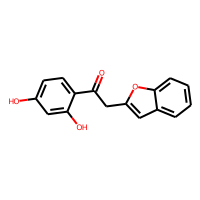
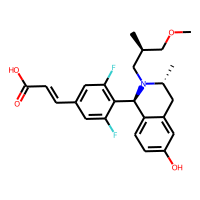
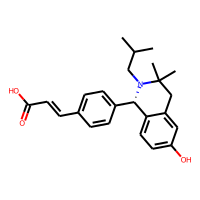
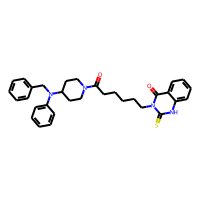
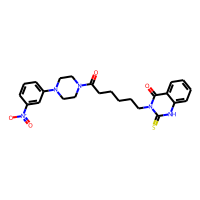

In [20]:
df.head()

In [21]:
df["Molwt"] = df["ROMol"].apply(Descriptors.MolWt)
df["LogP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)


,Molecule ChEMBL ID,smiles,#RO5 Violations,label,pIC50,ROMol,Molwt,LogP,HBA,HBD
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",268.268,3.26940,4,2
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",431.479,4.38670,4,2
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",379.500,4.87210,3,2
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",540.733,6.31729,5,1
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",481.578,3.87649,7,1

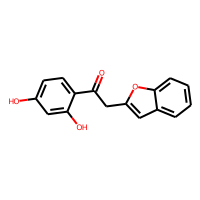
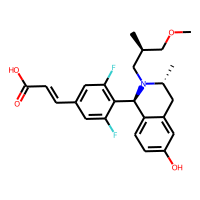
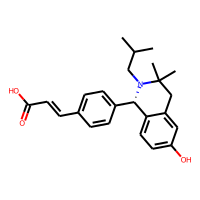
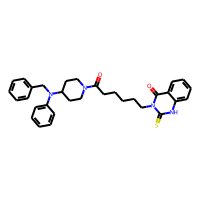
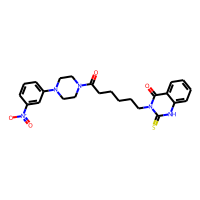

In [22]:
df.head()

In [23]:
df.drop("ROMol",axis=1,inplace=True)

In [24]:
df.head()

,Molecule ChEMBL ID,smiles,#RO5 Violations,label,pIC50,Molwt,LogP,HBA,HBD
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,0,4.067019,268.268,3.26940,4,2
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,1,8.920819,431.479,4.38670,4,2
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,1,6.017729,379.500,4.87210,3,2
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,1,6.920819,540.733,6.31729,5,1
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,1,6.075721,481.578,3.87649,7,1


In [25]:
df.to_csv("dataset_standard.csv",sep="\t",index=None,header=True)

### Chemical space analysis

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

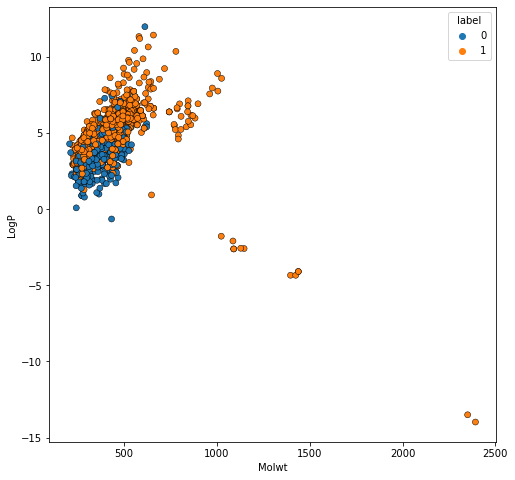

In [26]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=df["Molwt"],y=df["LogP"],hue=df["label"],edgecolor="black",alpha=1)
plt.plot

<AxesSubplot:xlabel='Molwt', ylabel='Count'>

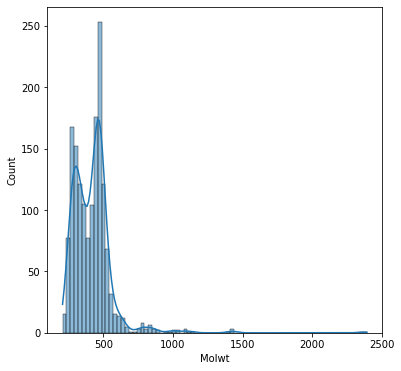

In [27]:
plt.figure(figsize=(6,6))
sns.histplot(df["Molwt"],kde=True)

<AxesSubplot:xlabel='LogP', ylabel='Count'>

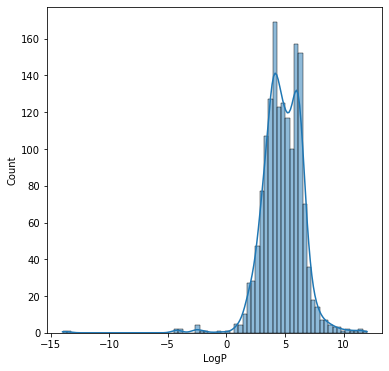

In [28]:
plt.figure(figsize=(6,6))
sns.histplot(df["LogP"],kde=True)

<AxesSubplot:xlabel='label', ylabel='Molwt'>

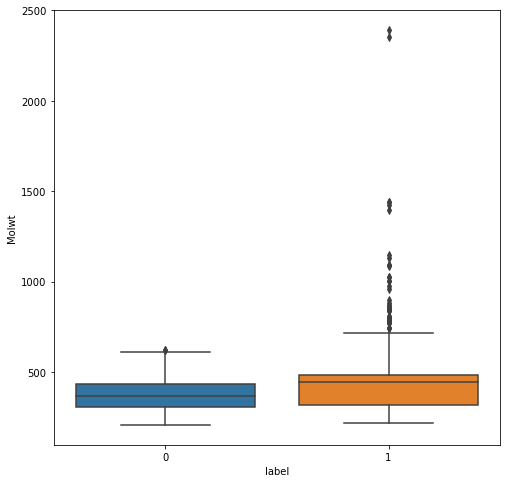

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["Molwt"])

<AxesSubplot:xlabel='label', ylabel='LogP'>

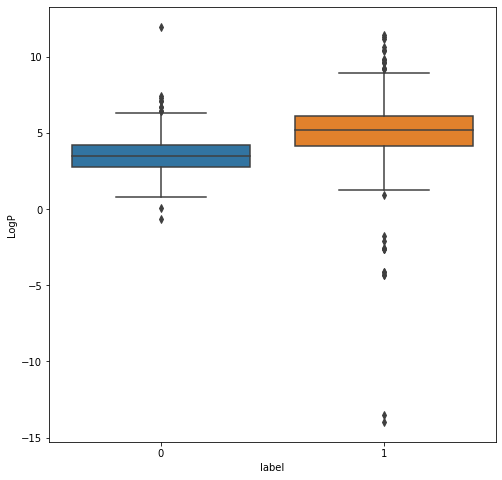

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["LogP"])

#### + It seems that lipophilicity contribute to activity

<AxesSubplot:xlabel='label', ylabel='HBA'>

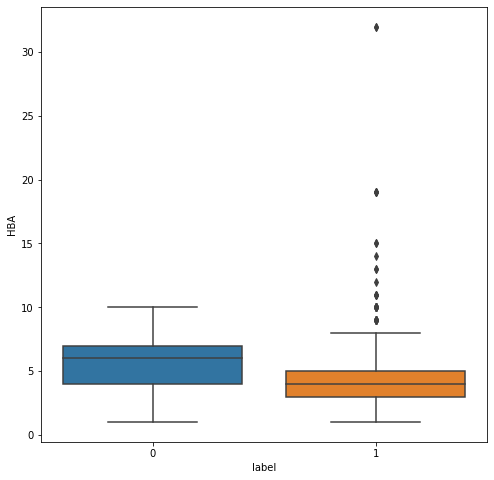

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["HBA"])

<AxesSubplot:xlabel='label', ylabel='HBD'>

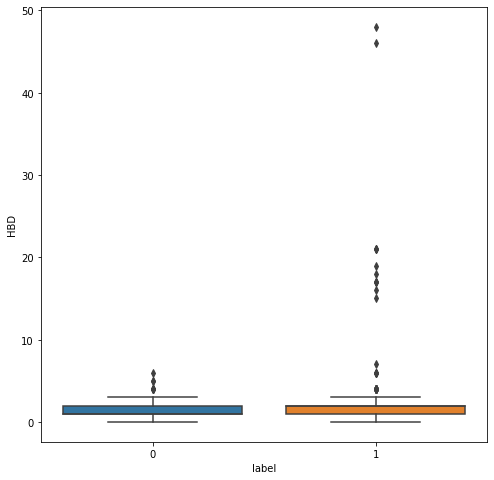

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["label"],y=df["HBD"])

<AxesSubplot:xlabel='#RO5 Violations', ylabel='count'>

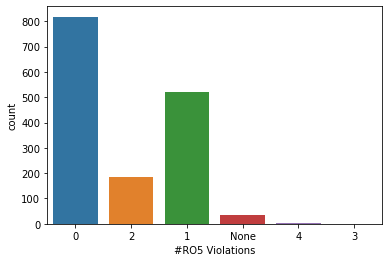

In [33]:
sns.countplot(x=df["#RO5 Violations"])